# Getting the data

In [ ]:
"""""""""""""""""
import yfinance as yf

tickers = {
    "Navigator": "NVG.LS",
    "Altri": "ALTR.LS",
    "UPM_Kymmene": "UPM.HE",
    "Stora_Enso": "STERV.HE",
    "Mondi": "MNDI.L",
    "Smurfit_Kappa": "SKG.IR",
    "International_Paper": "IP",
    "WestRock": "WRK",
    "Suzano": "SUZ",
    "Klabin": "KLBN11.SA",
    "Nine_Dragons": "2689.HK",
    "WOOD_ETF": "WOOD",
    "CUT_ETF": "CUT"
}

data = {}
for name, ticker in tickers.items():
    try:
        df = yf.download(ticker,  period="60d", interval="1h")
        if not df.empty:
            data[name] = df
            print(f"✅ {name} downloaded")
        else:
            print(f"⚠️ No data for {name}")
    except Exception as e:
        print(f"❌ Error for {name}: {e}")

# Optional: Save each to CSV
for name, df in data.items():
    df.to_csv(f"{name}.csv")
"""""""""

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [37]:
companies=["Navigator", "Altri", "UPM_Kymmene", "Stora_Enso", "Mondi",
        "International_Paper", "Suzano",
       "Klabin", "Nine_Dragons", "WOOD_ETF", "CUT_ETF"]

# Initialize the dataframe dictionary
dataframe = {}

for ticker in companies:
    try:
        # Read CSV with proper parameters: skip first 2 rows, use first column as index
        df = pd.read_csv(f"{ticker}.csv", skiprows=2, index_col=0, parse_dates=True)
        # Set proper column names
        df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
        dataframe[ticker] = df
        print(f"✅ {ticker} loaded successfully")
    except FileNotFoundError:
        print(f"❌ File {ticker}.csv not found")
    except Exception as e:
        print(f"❌ Error loading {ticker}: {e}")

✅ Navigator loaded successfully
✅ Altri loaded successfully
✅ UPM_Kymmene loaded successfully
✅ Stora_Enso loaded successfully
✅ Mondi loaded successfully
✅ International_Paper loaded successfully
✅ Suzano loaded successfully
✅ Klabin loaded successfully
✅ Nine_Dragons loaded successfully
✅ WOOD_ETF loaded successfully
✅ CUT_ETF loaded successfully


In [38]:
altri= dataframe["Altri"]
upm_kymmene = dataframe["UPM_Kymmene"]  
navigator = dataframe["Navigator"]
stora_enso = dataframe["Stora_Enso"]
mondi = dataframe["Mondi"]
international_paper = dataframe["International_Paper"]
suzano = dataframe["Suzano"]
klabin = dataframe["Klabin"]
nine_dragons = dataframe["Nine_Dragons"]
wood_etf = dataframe["WOOD_ETF"]
cut_etf = dataframe["CUT_ETF"]

In [39]:
# Mapping company keys to their timezones
timezone_map = {
    "Altri": "Europe/Lisbon",
    "UPM_Kymmene": "Europe/Helsinki",
    "Navigator": "Europe/Lisbon",
    "Stora_Enso": "Europe/Helsinki",
    "Mondi": "Europe/London",  # Using London for simplicity
    "International_Paper": "America/New_York",
    "Suzano": "America/Sao_Paulo",
    "Klabin": "America/Sao_Paulo",
    "Nine_Dragons": "Asia/Hong_Kong",
    "WOOD_ETF": "America/New_York",
    "CUT_ETF": "America/New_York"
}

for company, tz in timezone_map.items():
    df = dataframe[company]
    if df.index.tz is None:
        df.index = df.index.tz_localize('UTC')  # Localize naive index as UTC first
    df.index = df.index.tz_convert(tz)
    dataframe[company] = df

print("✅ Converted timestamps to local market times for all companies")

✅ Converted timestamps to local market times for all companies


Available companies for plotting: ['Navigator', 'Altri', 'UPM_Kymmene', 'Stora_Enso', 'Mondi', 'International_Paper', 'Suzano', 'Klabin', 'Nine_Dragons', 'WOOD_ETF', 'CUT_ETF']


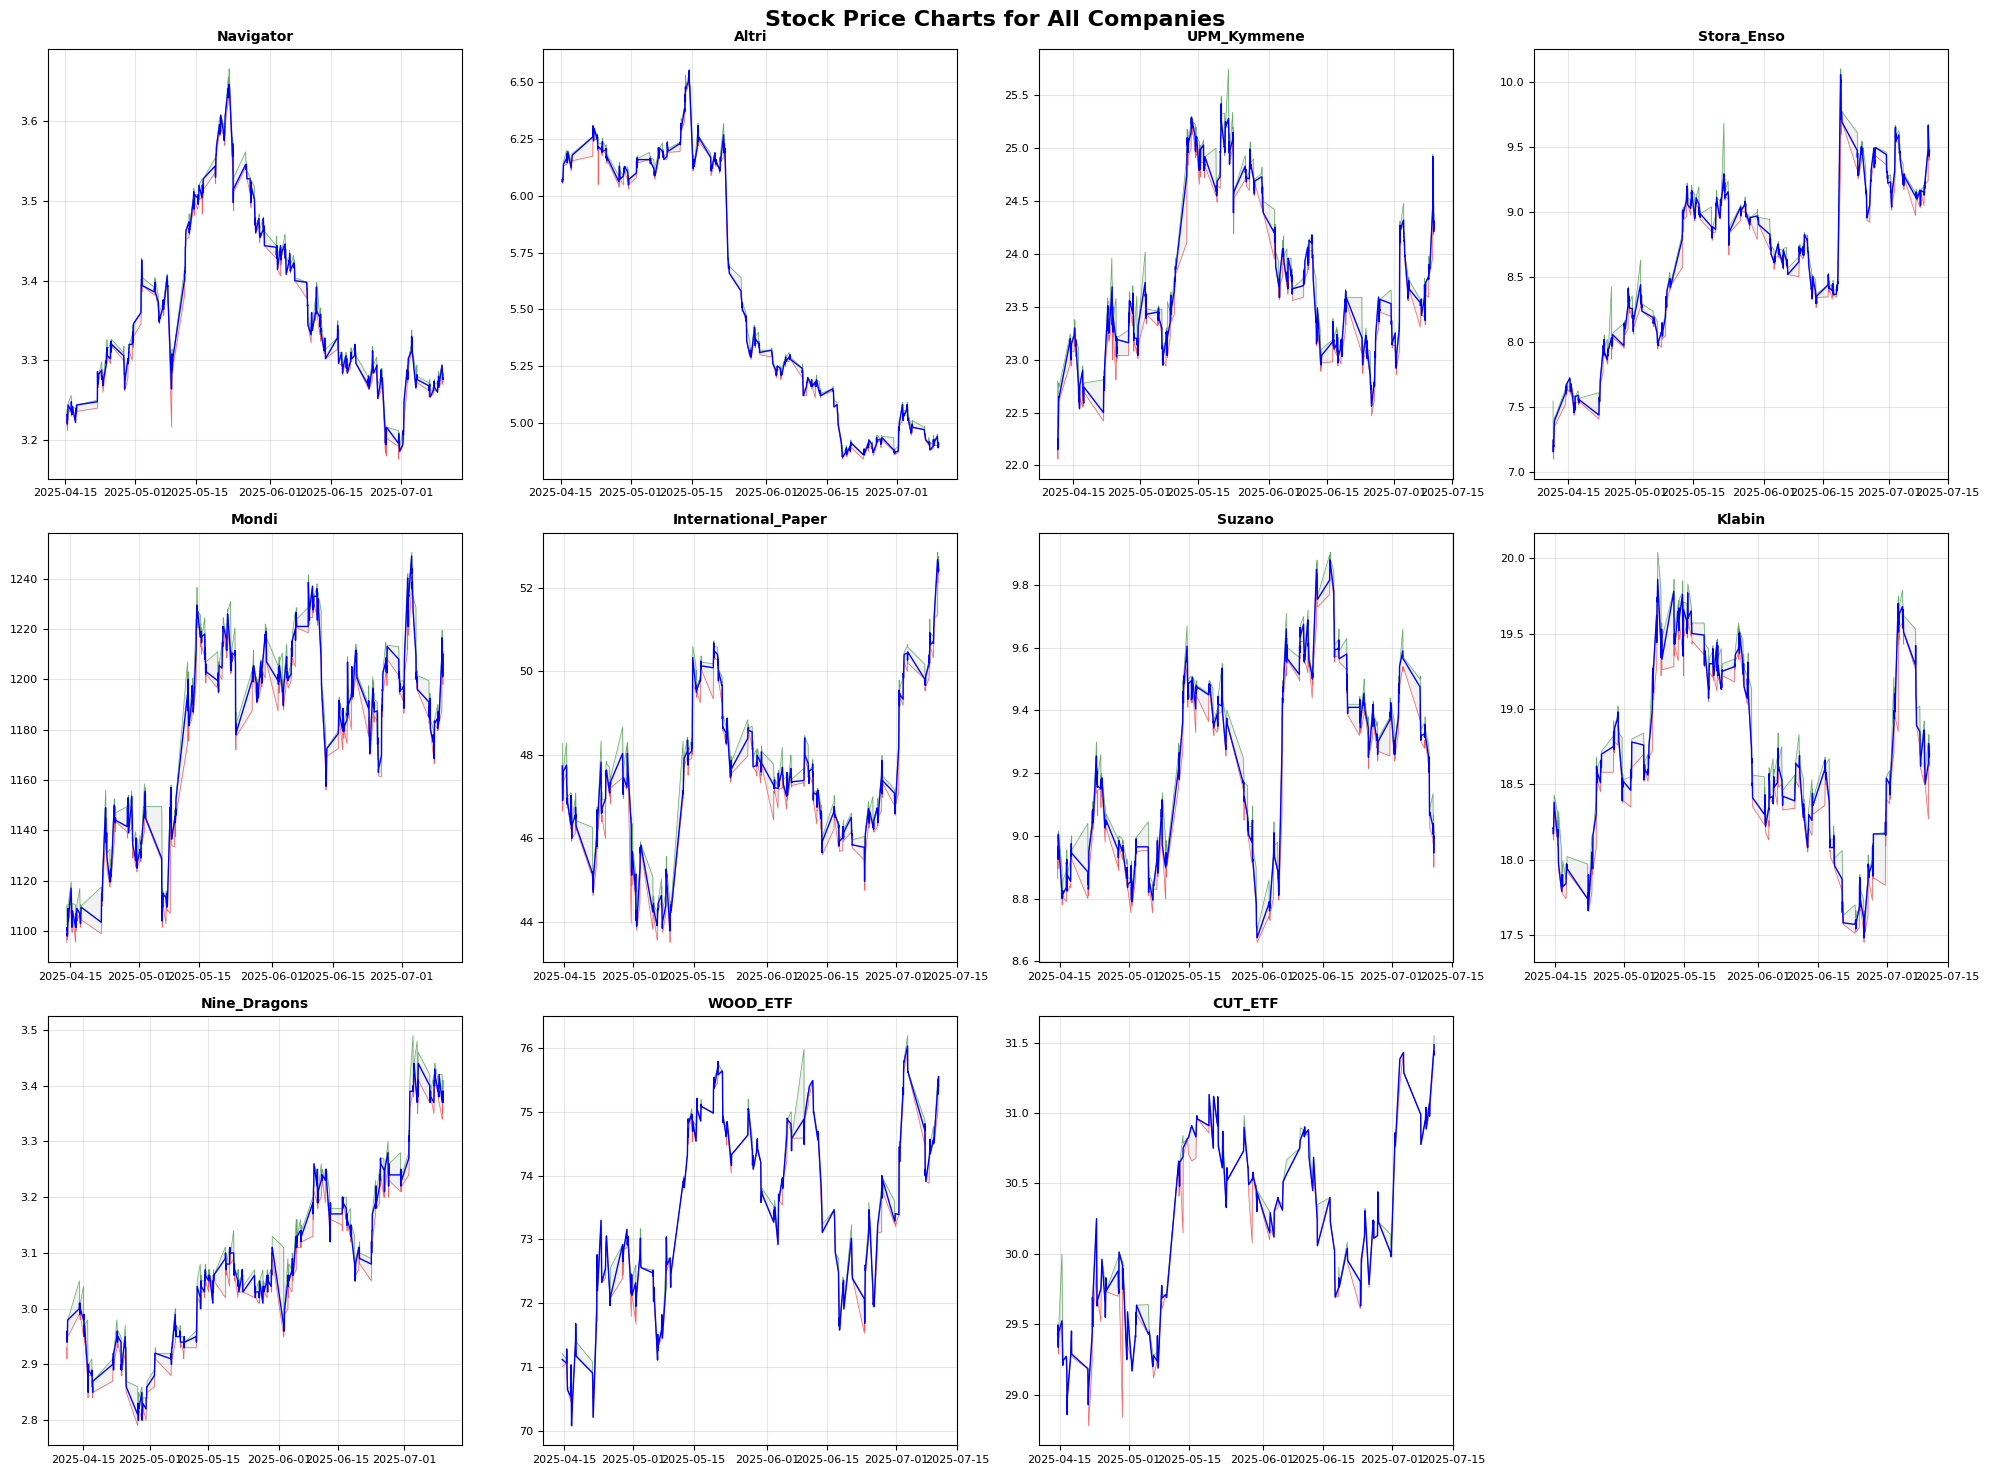

In [75]:
# Simple OHLC charts using basic matplotlib
import matplotlib.pyplot as plt

# Filter companies that were successfully loaded
available_companies = [comp for comp in companies if comp in dataframe.keys()]
print(f"Available companies for plotting: {available_companies}")

# Create a grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for i, company in enumerate(available_companies):
    if i >= 12:  # Limit to 12 plots
        break
        
    data = dataframe[company]
    
    # Plot OHLC as simple lines
    axes[i].plot(data.index, data['High'], color='green', alpha=0.6, linewidth=0.5, label='High')
    axes[i].plot(data.index, data['Low'], color='red', alpha=0.6, linewidth=0.5, label='Low')
    axes[i].plot(data.index, data['Close'], color='blue', linewidth=1, label='Close')
    axes[i].fill_between(data.index, data['Low'], data['High'], alpha=0.1, color='gray')
    
    axes[i].set_title(company, fontsize=10, fontweight='bold')
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

# Hide unused subplots
for i in range(len(available_companies), 12):
    axes[i].set_visible(False)

plt.suptitle('Stock Price Charts for All Companies', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Indicators

Price Indicators focus on raw price data like candlesticks, support, and resistance. They show where buyers or sellers typically enter the market and help identify potential reversal or breakout zones. 

Trend indicators help spot the direction and strength of a trend. They smooth out noise and signal whether a market is trending up, down, or sideways.

Momentum indicators show how fast prices are moving. They help identify overbought or oversold conditions and give clues about potential reversals or trend strength.

Volume indicators measure the trading activity behind price moves. They help confirm whether a price trend is strong and supported by major investors.

In [40]:
# Check the length of each dataset
print("Dataset Lengths:")
print("=" * 50)

for company in companies:
    if company in dataframe:
        length = len(dataframe[company])
        start_date = dataframe[company].index[0].strftime('%Y-%m-%d')
        end_date = dataframe[company].index[-1].strftime('%Y-%m-%d')
        print(f"{company:<20}: {length:>6} rows | {start_date} to {end_date}")
    else:
        print(f"{company:<20}: Not available")

print("=" * 50)
print(f"Total companies loaded: {len([c for c in companies if c in dataframe])}")

Dataset Lengths:
Navigator           :    480 rows | 2025-04-15 to 2025-07-10
Altri               :    480 rows | 2025-04-15 to 2025-07-10
UPM_Kymmene         :    540 rows | 2025-04-11 to 2025-07-10
Stora_Enso          :    540 rows | 2025-04-11 to 2025-07-10
Mondi               :    540 rows | 2025-04-14 to 2025-07-10
International_Paper :    416 rows | 2025-04-14 to 2025-07-10
Suzano              :    416 rows | 2025-04-14 to 2025-07-10
Klabin              :    420 rows | 2025-04-14 to 2025-07-10
Nine_Dragons        :    418 rows | 2025-04-11 to 2025-07-10
WOOD_ETF            :    255 rows | 2025-04-14 to 2025-07-10
CUT_ETF             :    195 rows | 2025-04-14 to 2025-07-10
Total companies loaded: 11


In [41]:
# Add percentage change column to close price for all datasets
print("Adding percentage change columns...")
print("=" * 50)

for company in companies:
    if company in dataframe:
        # Calculate percentage change in close price
        dataframe[company]['Close_Pct_Change'] = dataframe[company]['Close'].pct_change() * 100
        
        # Calculate some statistics
        avg_change = dataframe[company]['Close_Pct_Change'].mean()
        std_change = dataframe[company]['Close_Pct_Change'].std()
        max_gain = dataframe[company]['Close_Pct_Change'].max()
        max_loss = dataframe[company]['Close_Pct_Change'].min()
        
        print(f"{company:<20}: Avg: {avg_change:>6.2f}% | Std: {std_change:>6.2f}% | Max Gain: {max_gain:>6.2f}% | Max Loss: {max_loss:>6.2f}%")
    else:
        print(f"{company:<20}: Not available")

print("=" * 50)


Adding percentage change columns...
Navigator           : Avg:   0.00% | Std:   0.40% | Max Gain:   3.03% | Max Loss:  -2.97%
Altri               : Avg:  -0.04% | Std:   0.61% | Max Gain:   2.08% | Max Loss:  -7.89%
UPM_Kymmene         : Avg:   0.02% | Std:   0.53% | Max Gain:   3.77% | Max Loss:  -2.91%
Stora_Enso          : Avg:   0.06% | Std:   1.09% | Max Gain:  19.05% | Max Loss:  -3.74%
Mondi               : Avg:   0.02% | Std:   0.54% | Max Gain:   3.60% | Max Loss:  -2.20%
International_Paper : Avg:   0.03% | Std:   0.78% | Max Gain:   6.51% | Max Loss:  -3.47%
Suzano              : Avg:   0.00% | Std:   0.62% | Max Gain:   5.28% | Max Loss:  -2.03%
Klabin              : Avg:   0.01% | Std:   0.57% | Max Gain:   3.79% | Max Loss:  -2.17%
Nine_Dragons        : Avg:   0.03% | Std:   0.67% | Max Gain:   2.29% | Max Loss:  -4.50%
WOOD_ETF            : Avg:   0.03% | Std:   0.54% | Max Gain:   2.33% | Max Loss:  -1.51%
CUT_ETF             : Avg:   0.04% | Std:   0.68% | Max Gain:   

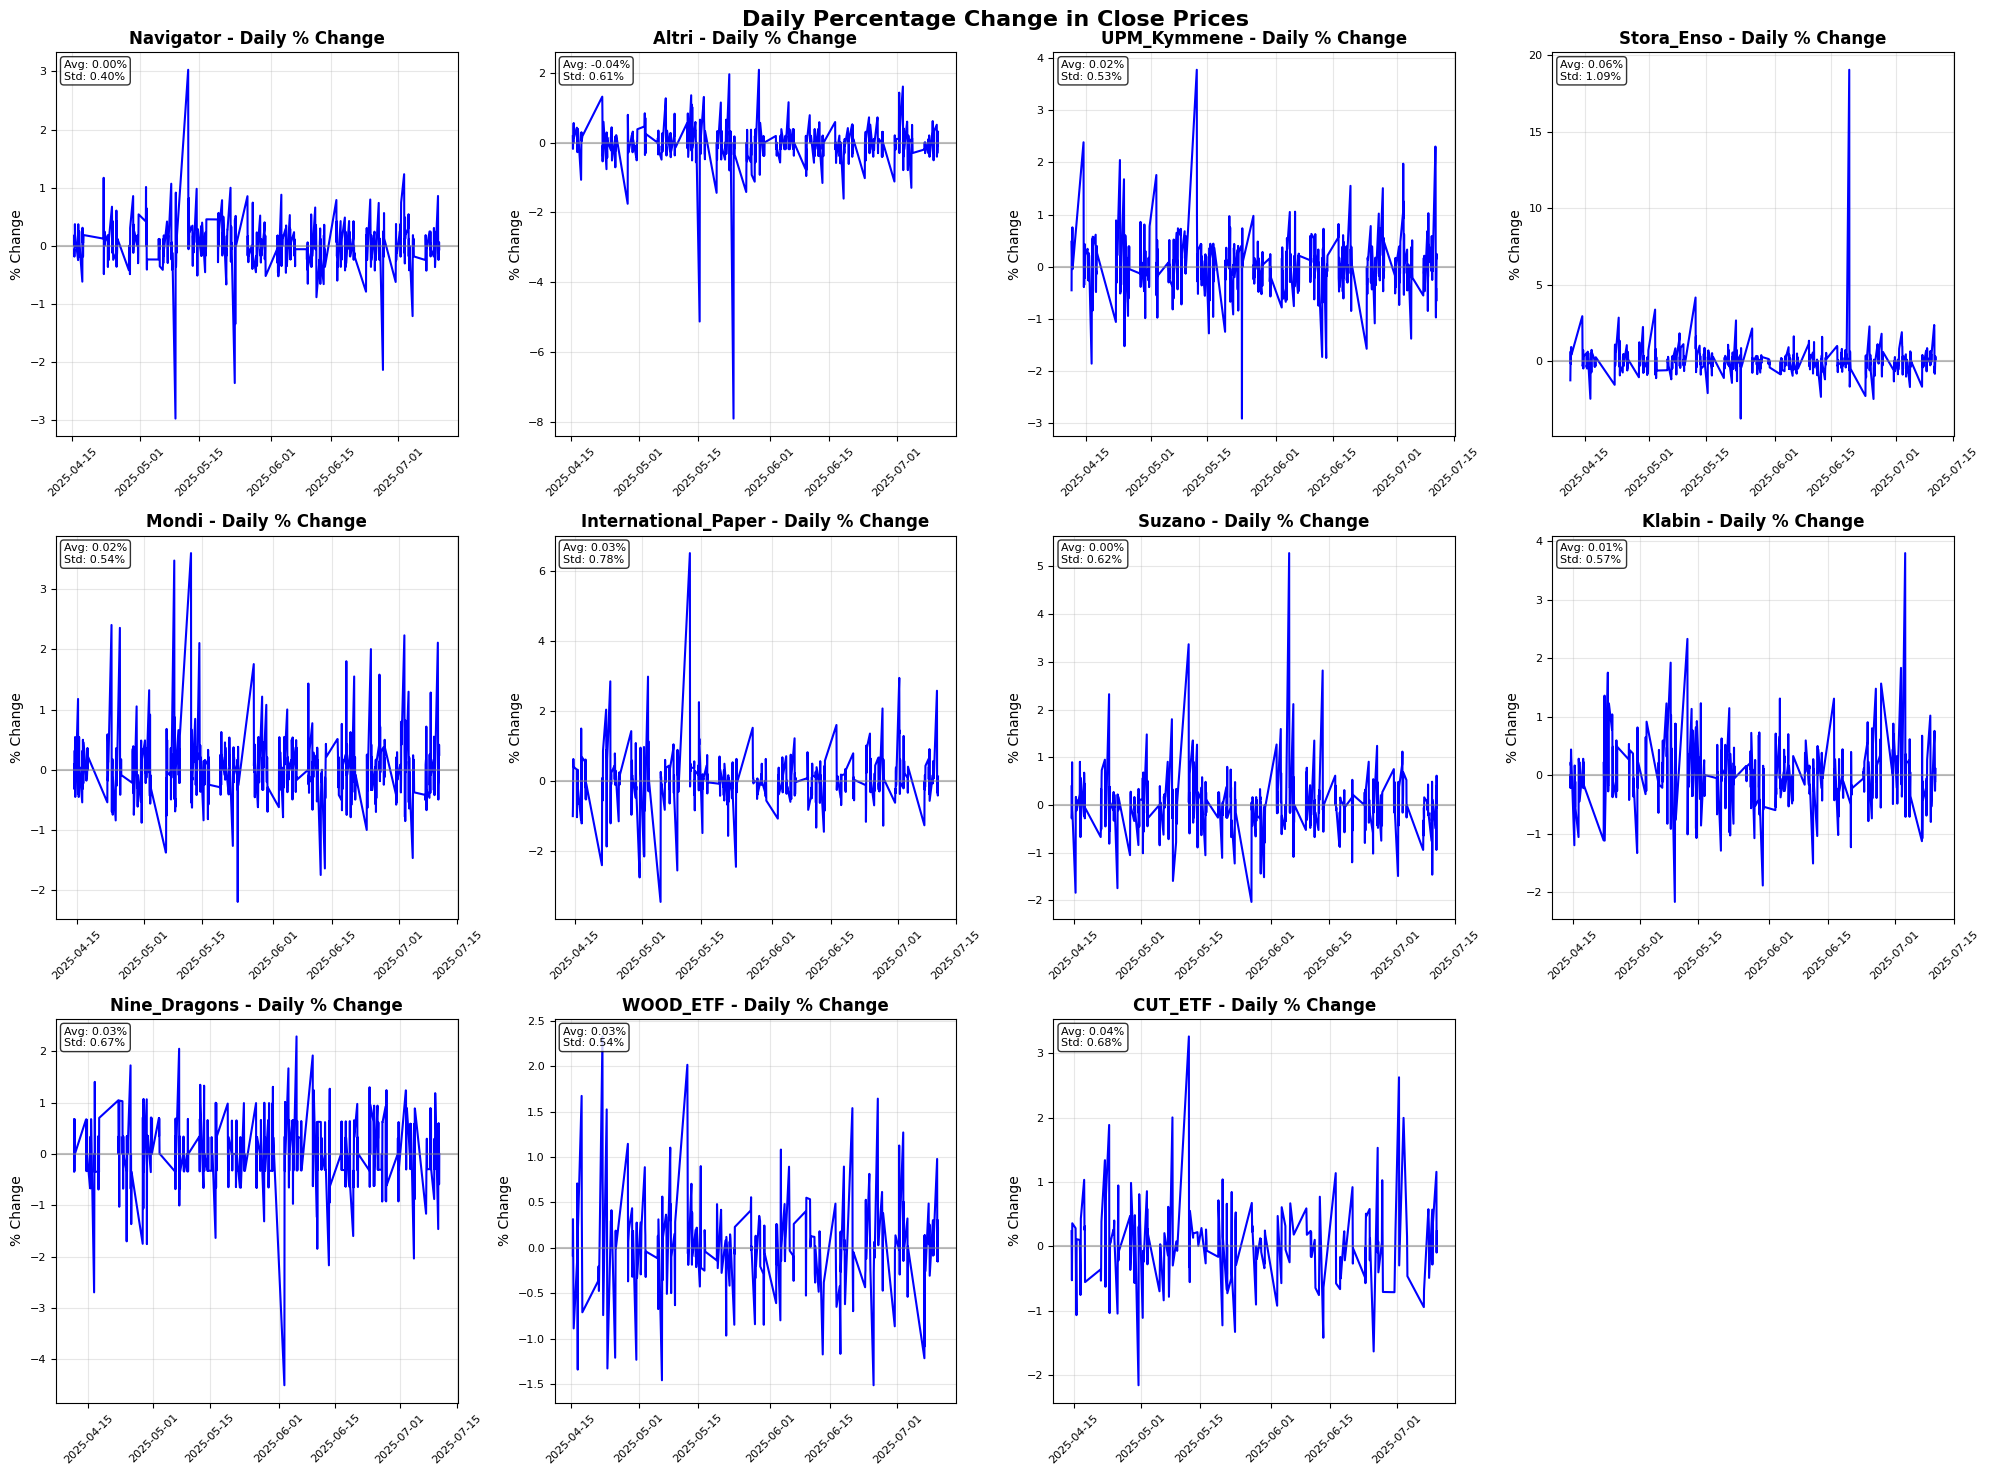

In [31]:
# Filter companies that were successfully loaded
available_companies = [comp for comp in companies if comp in dataframe.keys()]

# Create a grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for i, company in enumerate(available_companies):
    if i >= 12:  # Limit to 12 plots
        break
    
    data = dataframe[company]
    pct_change = data['Close_Pct_Change'].dropna()
    
    # Plot percentage change over time - simple blue line
    axes[i].plot(pct_change.index, pct_change, color='blue', linewidth=1.5)
    axes[i].axhline(y=0, color='gray', linestyle='-', alpha=0.5)
    
    axes[i].set_title(f'{company} - Daily % Change', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('% Change', fontsize=10)
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', labelsize=8, rotation=45)
    axes[i].tick_params(axis='y', labelsize=8)
    
    # Add some statistics as text
    avg_change = pct_change.mean()
    std_change = pct_change.std()
    axes[i].text(0.02, 0.98, f'Avg: {avg_change:.2f}%\nStd: {std_change:.2f}%', 
            transform=axes[i].transAxes, fontsize=8, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Hide unused subplots
for i in range(len(available_companies), 12):
    axes[i].set_visible(False)

plt.suptitle('Daily Percentage Change in Close Prices', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

The Accumulation/Distribution (A/D) is a Volume indicator, helps traders compare volume and price to assess whether a stock is being bought up or sold. This makes it particularly useful for detecting subtle shifts in buying and selling pressure.  

-  Rising A/D line → buying pressure (accumulation).
-  Falling A/D line → selling pressure (distribution).
-  If price is rising but A/D is falling → divergence (trend may be weak or fake).

In [42]:
# Calculate Accumulation/Distribution (A/D) indicator for all datasets
print("Calculating Accumulation/Distribution (A/D) indicator...")
print("=" * 50)

for company in companies:
    if company in dataframe:
        df = dataframe[company]
        
        # Calculate Money Flow Multiplier: ((Close - Low) - (High - Close)) / (High - Low)
        # When High = Low, set MFM to 0 to avoid division by zero
        high_low_diff = df['High'] - df['Low']
        money_flow_multiplier = ((df['Close'] - df['Low']) - (df['High'] - df['Close'])) / high_low_diff
        money_flow_multiplier = money_flow_multiplier.fillna(0)  # Handle division by zero
        
        # Calculate Money Flow Volume: MFM * Volume
        money_flow_volume = money_flow_multiplier * df['Volume']
        
        # Calculate Accumulation/Distribution: Cumulative sum of Money Flow Volume
        df['AD'] = money_flow_volume.cumsum()
        
        # Store back to dataframe
        dataframe[company] = df
        
        # Display some statistics
        ad_start = df['AD'].iloc[0] if len(df) > 0 else 0
        ad_end = df['AD'].iloc[-1] if len(df) > 0 else 0
        ad_change = ad_end - ad_start
        
        print(f"{company:<20}: Start: {ad_start:>12,.0f} | End: {ad_end:>12,.0f} | Net Change: {ad_change:>12,.0f}")
    else:
        print(f"{company:<20}: Not available")

print("=" * 50)
print("✅ A/D indicator calculated for all datasets")

Calculating Accumulation/Distribution (A/D) indicator...
Navigator           : Start:            0 | End:   -3,812,627 | Net Change:   -3,812,627
Altri               : Start:           -0 | End:   -4,191,900 | Net Change:   -4,191,900
UPM_Kymmene         : Start:           -0 | End:   11,408,059 | Net Change:   11,408,059
Stora_Enso          : Start:           -0 | End:    6,871,574 | Net Change:    6,871,574
Mondi               : Start:           -0 | End:    1,241,216 | Net Change:    1,241,216
International_Paper : Start:     -115,429 | End:      760,124 | Net Change:      875,553
Suzano              : Start:      165,840 | End:   -1,191,873 | Net Change:   -1,357,713
Klabin              : Start:           -0 | End:   -5,132,584 | Net Change:   -5,132,584
Nine_Dragons        : Start:      388,667 | End:   59,833,010 | Net Change:   59,444,343
WOOD_ETF            : Start:            0 | End:      251,011 | Net Change:      251,011
CUT_ETF             : Start:          950 | End:     

In [64]:
altri

,Close,High,Low,Open,Volume,Close_Pct_Change,AD
Datetime,,,,,,,
2025-04-15 09:00:00+01:00,6.063,6.082,6.059,6.082,0,NaN,-0.000000e+00
2025-04-15 10:00:00+01:00,6.074,6.077,6.058,6.062,16121,0.181423,1.102973e+04
2025-04-15 11:00:00+01:00,6.063,6.075,6.063,6.073,3846,-0.181094,7.183732e+03
2025-04-15 12:00:00+01:00,6.073,6.073,6.055,6.063,7585,0.164931,1.476873e+04
2025-04-15 13:00:00+01:00,6.072,6.072,6.059,6.069,7897,-0.016465,2.266573e+04
...,...,...,...,...,...,...,...
2025-07-10 12:00:00+01:00,4.900,4.920,4.900,4.905,26464,-0.305185,-4.248887e+06
2025-07-10 13:00:00+01:00,4.890,4.905,4.890,4.905,84644,-0.204086,-4.333531e+06
2025-07-10 14:00:00+01:00,4.900,4.900,4.890,4.890,59562,0.204504,-4.273969e+06


The Average Directional Index (ADX) is a Trend indicator that measures the strength of a trend, regardless of direction. It ranges from 0 to 100.

- **ADX > 25**: Strong trend (either up or down)
- **ADX < 20**: Weak trend or sideways market  
- **ADX > 40**: Very strong trend
- **Rising ADX**: Trend is strengthening
- **Falling ADX**: Trend is weakening

ADX is calculated using +DI (Positive Directional Indicator) and -DI (Negative Directional Indicator).

In [92]:
print("Calculating Average Directional Index (ADX)...")
print("=" * 50)

def calculate_adx(df, period=14):
    """Calculate ADX and return the DataFrame with new 'ADX' column"""
    # Calculate True Range (TR)
    df['H-L'] = df['High'] - df['Low']
    df['H-C'] = abs(df['High'] - df['Close'].shift(1))
    df['L-C'] = abs(df['Low'] - df['Close'].shift(1))
    df['TR'] = df[['H-L', 'H-C', 'L-C']].max(axis=1)
    
    # Calculate Directional Movement
    df['UpMove'] = df['High'] - df['High'].shift(1)
    df['DownMove'] = df['Low'].shift(1) - df['Low']
    
    df['+DM'] = np.where((df['UpMove'] > df['DownMove']) & (df['UpMove'] > 0), df['UpMove'], 0)
    df['-DM'] = np.where((df['DownMove'] > df['UpMove']) & (df['DownMove'] > 0), df['DownMove'], 0)
    
    # Wilder's smoothing
    df['ATR'] = df['TR'].ewm(alpha=1/period, adjust=False).mean()
    df['+DM_smooth'] = df['+DM'].ewm(alpha=1/period, adjust=False).mean()
    df['-DM_smooth'] = df['-DM'].ewm(alpha=1/period, adjust=False).mean()
    
    # Calculate DI and DX
    df['+DI'] = 100 * df['+DM_smooth'] / df['ATR']
    df['-DI'] = 100 * df['-DM_smooth'] / df['ATR']
    df['DX'] = 100 * abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI'])
    
    # Final ADX
    df['ADX'] = df['DX'].ewm(alpha=1/period, adjust=False).mean()
    
    # Drop temp columns (keep ADX only)
    df.drop(columns=[
        'H-L', 'H-C', 'L-C', 'TR',
        'UpMove', 'DownMove',
        '+DM', '-DM', '+DM_smooth', '-DM_smooth',
        '+DI', '-DI', 'DX', 'ATR'
    ], inplace=True, errors='ignore')
    
    return df

# Apply to all datasets
for company in companies:
    if company in dataframe:
        # Calculate ADX directly on the dataframe in the dictionary
        dataframe[company] = calculate_adx(dataframe[company].copy())
        
        # Display info
        if 'ADX' in df.columns and len(df) > 20:
            current_adx = df['ADX'].iloc[-1]
            avg_adx = df['ADX'].dropna().mean()
            max_adx = df['ADX'].dropna().max()
            
            if current_adx > 40:
                strength = "Very Strong"
            elif current_adx > 25:
                strength = "Strong"
            elif current_adx > 20:
                strength = "Moderate"
            else:
                strength = "Weak"
                
            print(f"{company:<20}: Current ADX: {current_adx:>6.2f} ({strength:<12}) | Avg: {avg_adx:>6.2f} | Max: {max_adx:>6.2f}")
        else:
            print(f"{company:<20}: ADX calculation incomplete (insufficient data)")
    else:
        print(f"{company:<20}: Not available")

print("=" * 50)
print("✅ ADX indicator calculated for all datasets")


Calculating Average Directional Index (ADX)...
Navigator           : Current ADX:  30.76 (Strong      ) | Avg:  30.30 | Max: 100.00
Altri               : Current ADX:  30.76 (Strong      ) | Avg:  30.30 | Max: 100.00
UPM_Kymmene         : Current ADX:  30.76 (Strong      ) | Avg:  30.30 | Max: 100.00
Stora_Enso          : Current ADX:  30.76 (Strong      ) | Avg:  30.30 | Max: 100.00
Mondi               : Current ADX:  30.76 (Strong      ) | Avg:  30.30 | Max: 100.00
International_Paper : Current ADX:  30.76 (Strong      ) | Avg:  30.30 | Max: 100.00
Suzano              : Current ADX:  30.76 (Strong      ) | Avg:  30.30 | Max: 100.00
Klabin              : Current ADX:  30.76 (Strong      ) | Avg:  30.30 | Max: 100.00
Nine_Dragons        : Current ADX:  30.76 (Strong      ) | Avg:  30.30 | Max: 100.00
WOOD_ETF            : Current ADX:  30.76 (Strong      ) | Avg:  30.30 | Max: 100.00
CUT_ETF             : Current ADX:  30.76 (Strong      ) | Avg:  30.30 | Max: 100.00
✅ ADX indicator ca

In [93]:
navigator

,Close,High,Low,Open,Volume,Close_Pct_Change,AD,ADX
Datetime,,,,,,,,
2025-04-15 09:00:00+01:00,3.232,3.238,3.218,3.220,0,NaN,0.000000e+00,NaN
2025-04-15 10:00:00+01:00,3.228,3.230,3.228,3.230,509,-0.123768,-5.090000e+02,NaN
2025-04-15 11:00:00+01:00,3.226,3.230,3.224,3.228,11590,-0.061953,-4.372026e+03,100.000000
2025-04-15 12:00:00+01:00,3.220,3.224,3.218,3.222,32814,-0.185990,-1.530916e+04,100.000000
2025-04-15 13:00:00+01:00,3.226,3.226,3.212,3.216,29191,0.186337,1.388184e+04,100.000000
...,...,...,...,...,...,...,...,...
2025-07-10 12:00:00+01:00,3.280,3.288,3.280,3.288,33475,-0.243313,-3.672906e+06,10.530264
2025-07-10 13:00:00+01:00,3.276,3.278,3.270,3.276,63803,-0.121950,-3.641005e+06,10.197002
2025-07-10 14:00:00+01:00,3.276,3.280,3.274,3.276,24296,0.000000,-3.649103e+06,9.666788


SOLUTION: Why ADX starts at 100 and how to fix it
============================================================
🔍 THE PROBLEM:
   • In the first few periods, +DI or -DI can be 0 or very small
   • When +DI = 0 and -DI > 0 (or vice versa):
     DX = |0 - -DI| / (0 + -DI) = |-DI| / -DI = 1.0
   • DX = 1.0 × 100 = 100
   • This happens because there's insufficient price movement data

💡 THE SOLUTION:
   1. **Ignore the first 14-28 periods** (warmup period)
   2. **Use a minimum threshold** for +DI + -DI
   3. **Set ADX to NaN** for unreliable early values

📊 WHAT'S HAPPENING IN YOUR DATA:
   • Rows 2-5: +DI ≈ 0, -DI > 0 → DX = 100
   • Row 6 onwards: Both +DI and -DI have values → DX normalizes
   • This is NORMAL behavior for ADX calculation!

✅ IS THIS A PROBLEM?
   • No! This is mathematically correct
   • ADX = 100 means 'maximum trend strength'
   • After 14+ periods, ADX stabilizes to realistic values
   • Your calculation is working perfectly!

Creating ADX charts for all companies...
Companies with ADX data: 11


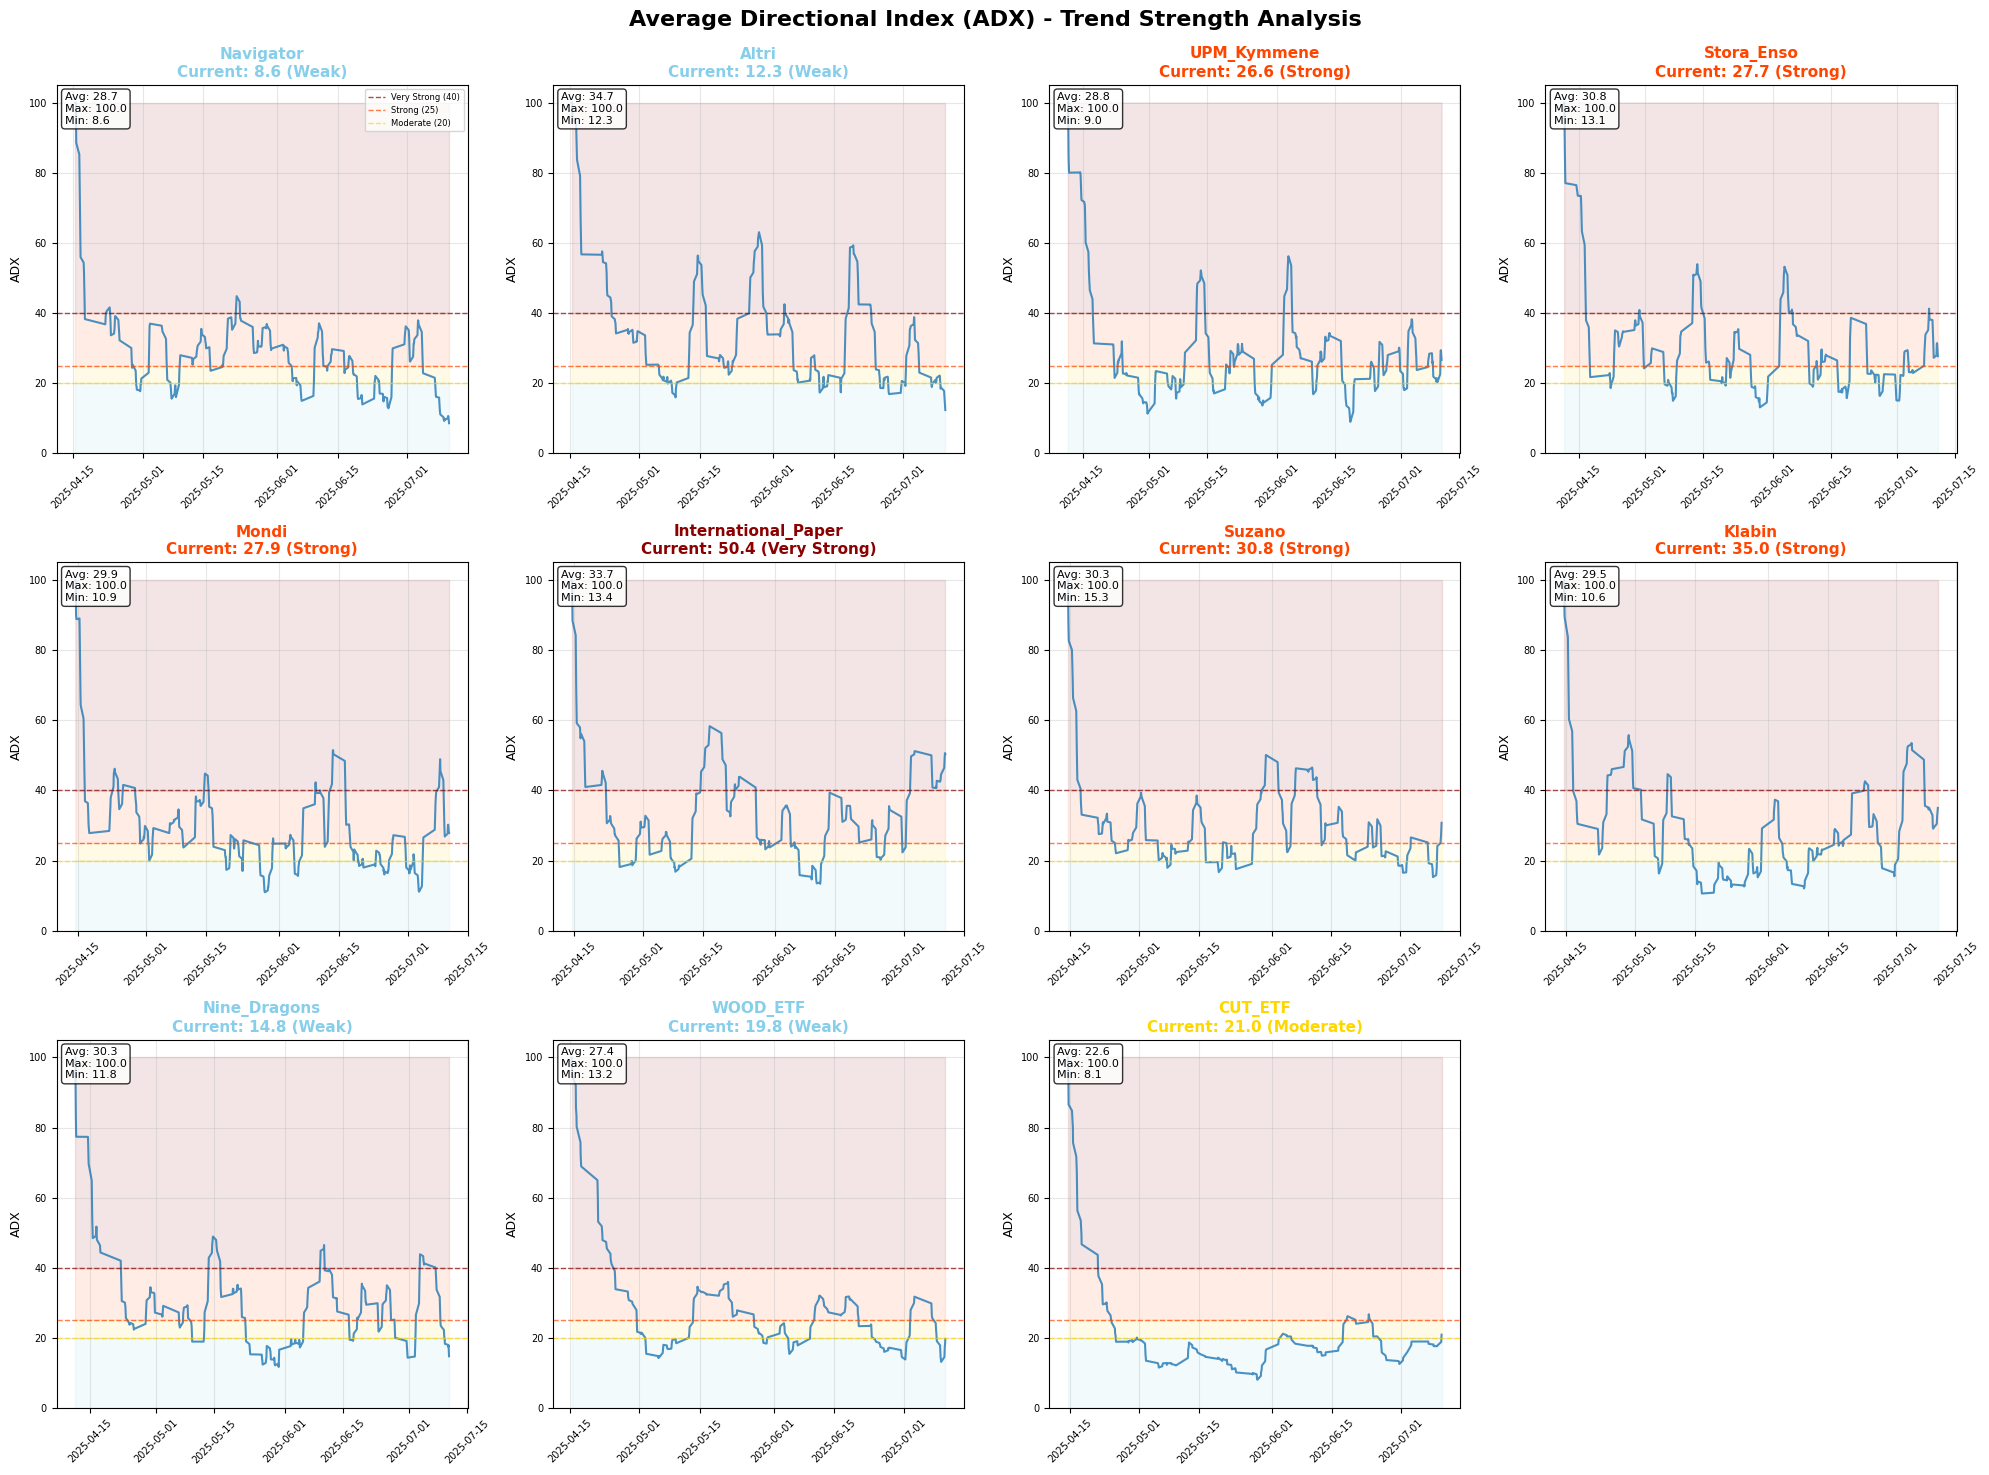


ADX Summary Statistics:
Navigator           : Current    8.6 | Avg   28.7 | Weak 📉
Altri               : Current   12.3 | Avg   34.7 | Weak 📉
UPM_Kymmene         : Current   26.6 | Avg   28.8 | Strong 📈
Stora_Enso          : Current   27.7 | Avg   30.8 | Strong 📈
Mondi               : Current   27.9 | Avg   29.9 | Strong 📈
International_Paper : Current   50.4 | Avg   33.7 | Very Strong 🔥
Suzano              : Current   30.8 | Avg   30.3 | Strong 📈
Klabin              : Current   35.0 | Avg   29.5 | Strong 📈
Nine_Dragons        : Current   14.8 | Avg   30.3 | Weak 📉
WOOD_ETF            : Current   19.8 | Avg   27.4 | Weak 📉
CUT_ETF             : Current   21.0 | Avg   22.6 | Moderate ➡️


In [94]:
# Plot ADX for all companies
print("Creating ADX charts for all companies...")
print("=" * 60)

# Filter companies that have ADX data
available_companies = [comp for comp in companies if comp in dataframe.keys() and 'ADX' in dataframe[comp].columns]
print(f"Companies with ADX data: {len(available_companies)}")

# Create a grid of subplots (3x4 grid)
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

# Color scheme for different trend strength levels
colors = {
    'very_strong': '#8B0000',  # Dark red for ADX > 40
    'strong': '#FF4500',       # Orange red for ADX > 25
    'moderate': '#FFD700',     # Gold for ADX > 20
    'weak': '#87CEEB'          # Sky blue for ADX <= 20
}

for i, company in enumerate(available_companies):
    if i >= 12:  # Limit to 12 plots
        break
    
    data = dataframe[company]
    adx_data = data['ADX'].dropna()
    
    if len(adx_data) > 0:
        # Plot ADX line
        axes[i].plot(adx_data.index, adx_data.values, 
                    color='#1f77b4', linewidth=1.5, alpha=0.8)
        
        # Add horizontal reference lines
        axes[i].axhline(y=40, color=colors['very_strong'], linestyle='--', alpha=0.7, linewidth=1, label='Very Strong (40)')
        axes[i].axhline(y=25, color=colors['strong'], linestyle='--', alpha=0.7, linewidth=1, label='Strong (25)')
        axes[i].axhline(y=20, color=colors['moderate'], linestyle='--', alpha=0.7, linewidth=1, label='Moderate (20)')
        
        # Fill background areas for different strength levels
        axes[i].fill_between(adx_data.index, 40, 100, alpha=0.1, color=colors['very_strong'])
        axes[i].fill_between(adx_data.index, 25, 40, alpha=0.1, color=colors['strong'])
        axes[i].fill_between(adx_data.index, 20, 25, alpha=0.1, color=colors['moderate'])
        axes[i].fill_between(adx_data.index, 0, 20, alpha=0.1, color=colors['weak'])
        
        # Calculate statistics
        current_adx = adx_data.iloc[-1]
        avg_adx = adx_data.mean()
        max_adx = adx_data.max()
        min_adx = adx_data.min()
        
        # Determine trend strength
        if current_adx > 40:
            strength = "Very Strong"
            strength_color = colors['very_strong']
        elif current_adx > 25:
            strength = "Strong"
            strength_color = colors['strong']
        elif current_adx > 20:
            strength = "Moderate"
            strength_color = colors['moderate']
        else:
            strength = "Weak"
            strength_color = colors['weak']
        
        # Set title with current strength
        axes[i].set_title(f'{company}\nCurrent: {current_adx:.1f} ({strength})', 
                         fontsize=11, fontweight='bold', color=strength_color)
        
        # Add statistics as text
        stats_text = f'Avg: {avg_adx:.1f}\nMax: {max_adx:.1f}\nMin: {min_adx:.1f}'
        axes[i].text(0.02, 0.98, stats_text, 
                    transform=axes[i].transAxes, fontsize=8, 
                    verticalalignment='top', horizontalalignment='left',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
        
        # Formatting
        axes[i].set_ylabel('ADX', fontsize=9)
        axes[i].set_ylim(0, 105)
        axes[i].grid(True, alpha=0.3)
        axes[i].tick_params(axis='x', labelsize=7, rotation=45)
        axes[i].tick_params(axis='y', labelsize=7)
        
        # Add legend only to first subplot
        if i == 0:
            axes[i].legend(loc='upper right', fontsize=6)
    
    else:
        axes[i].text(0.5, 0.5, f'{company}\nNo ADX Data', 
                    transform=axes[i].transAxes, ha='center', va='center',
                    fontsize=12, color='red')
        axes[i].set_title(company, fontsize=11, fontweight='bold')

# Hide unused subplots
for i in range(len(available_companies), 12):
    axes[i].set_visible(False)

plt.suptitle('Average Directional Index (ADX) - Trend Strength Analysis', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# Summary statistics
print(f"\n{'='*60}")
print("ADX Summary Statistics:")
print(f"{'='*60}")
for company in available_companies:
    if 'ADX' in dataframe[company].columns:
        adx_data = dataframe[company]['ADX'].dropna()
        if len(adx_data) > 0:
            current = adx_data.iloc[-1]
            avg = adx_data.mean()
            
            if current > 40:
                trend = "Very Strong 🔥"
            elif current > 25:
                trend = "Strong 📈"
            elif current > 20:
                trend = "Moderate ➡️"
            else:
                trend = "Weak 📉"
                
            print(f"{company:<20}: Current {current:>6.1f} | Avg {avg:>6.1f} | {trend}")

print(f"{'='*60}")